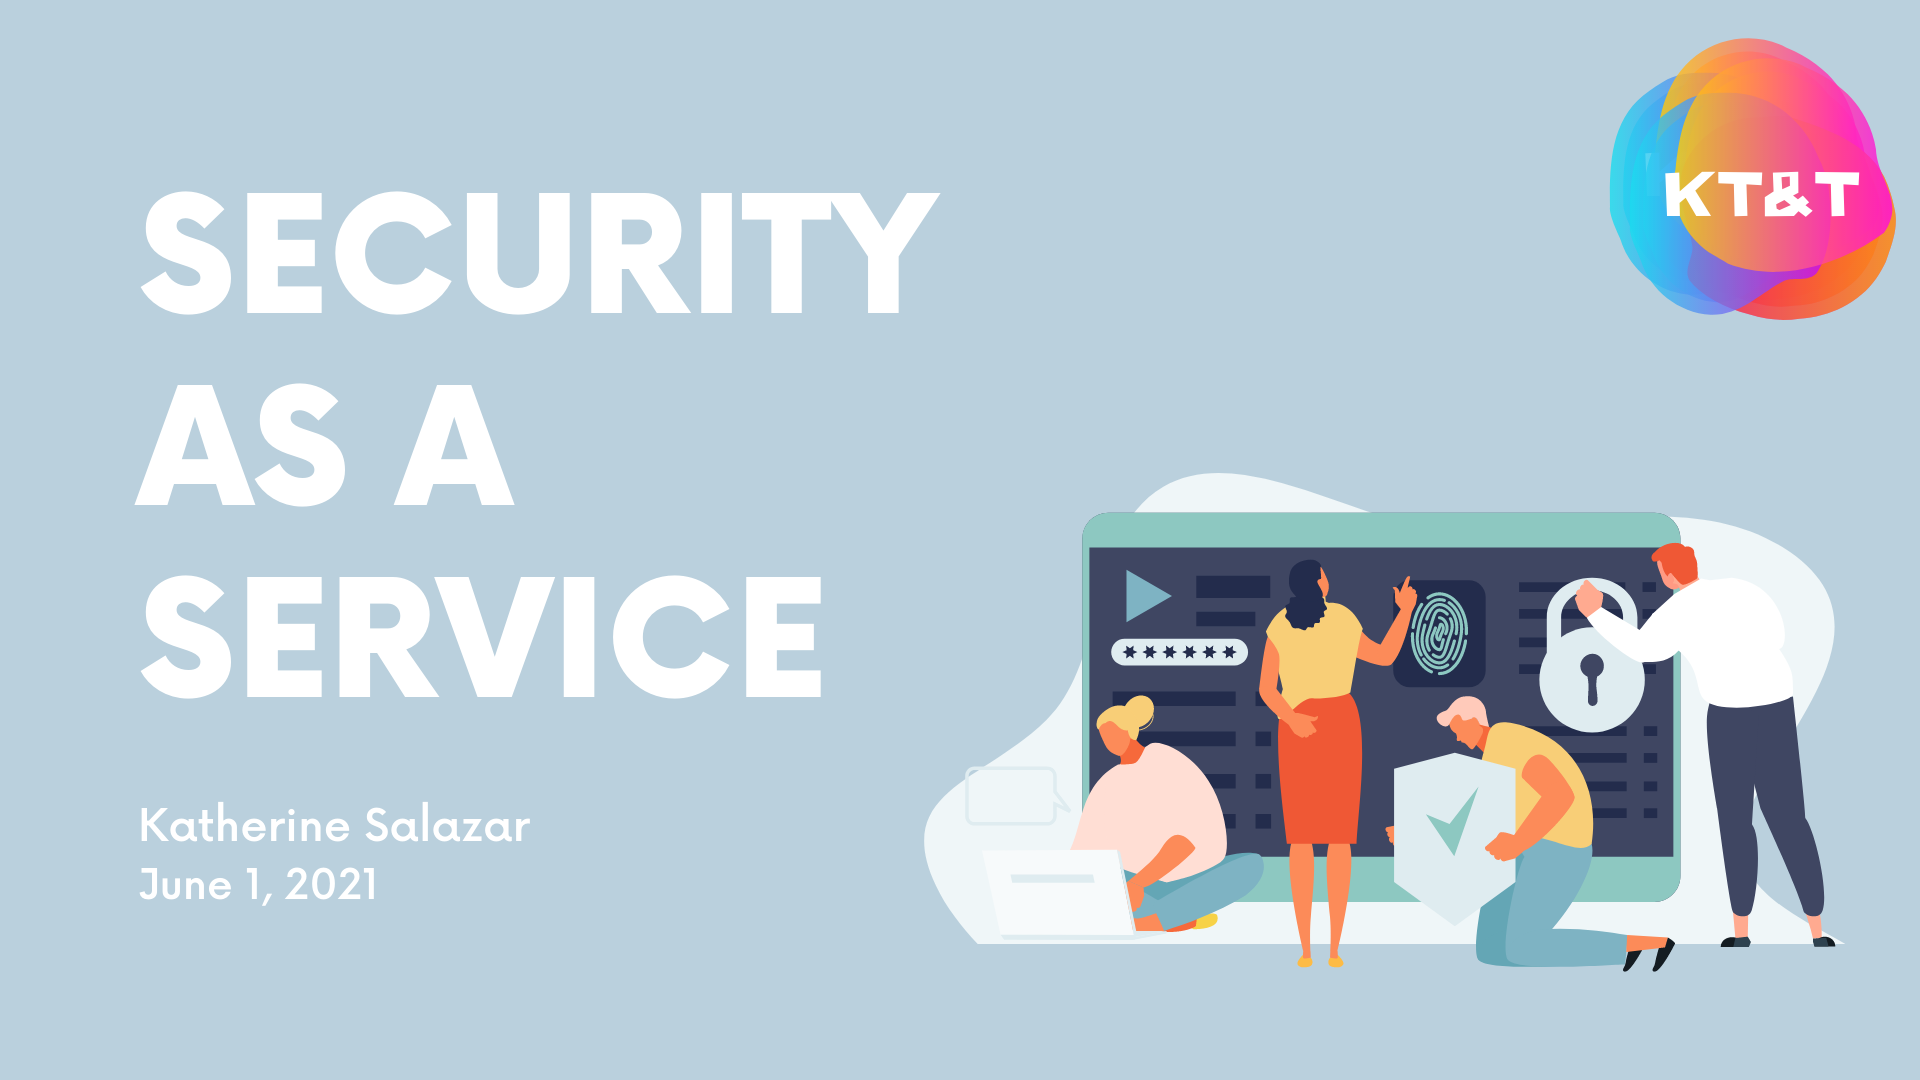

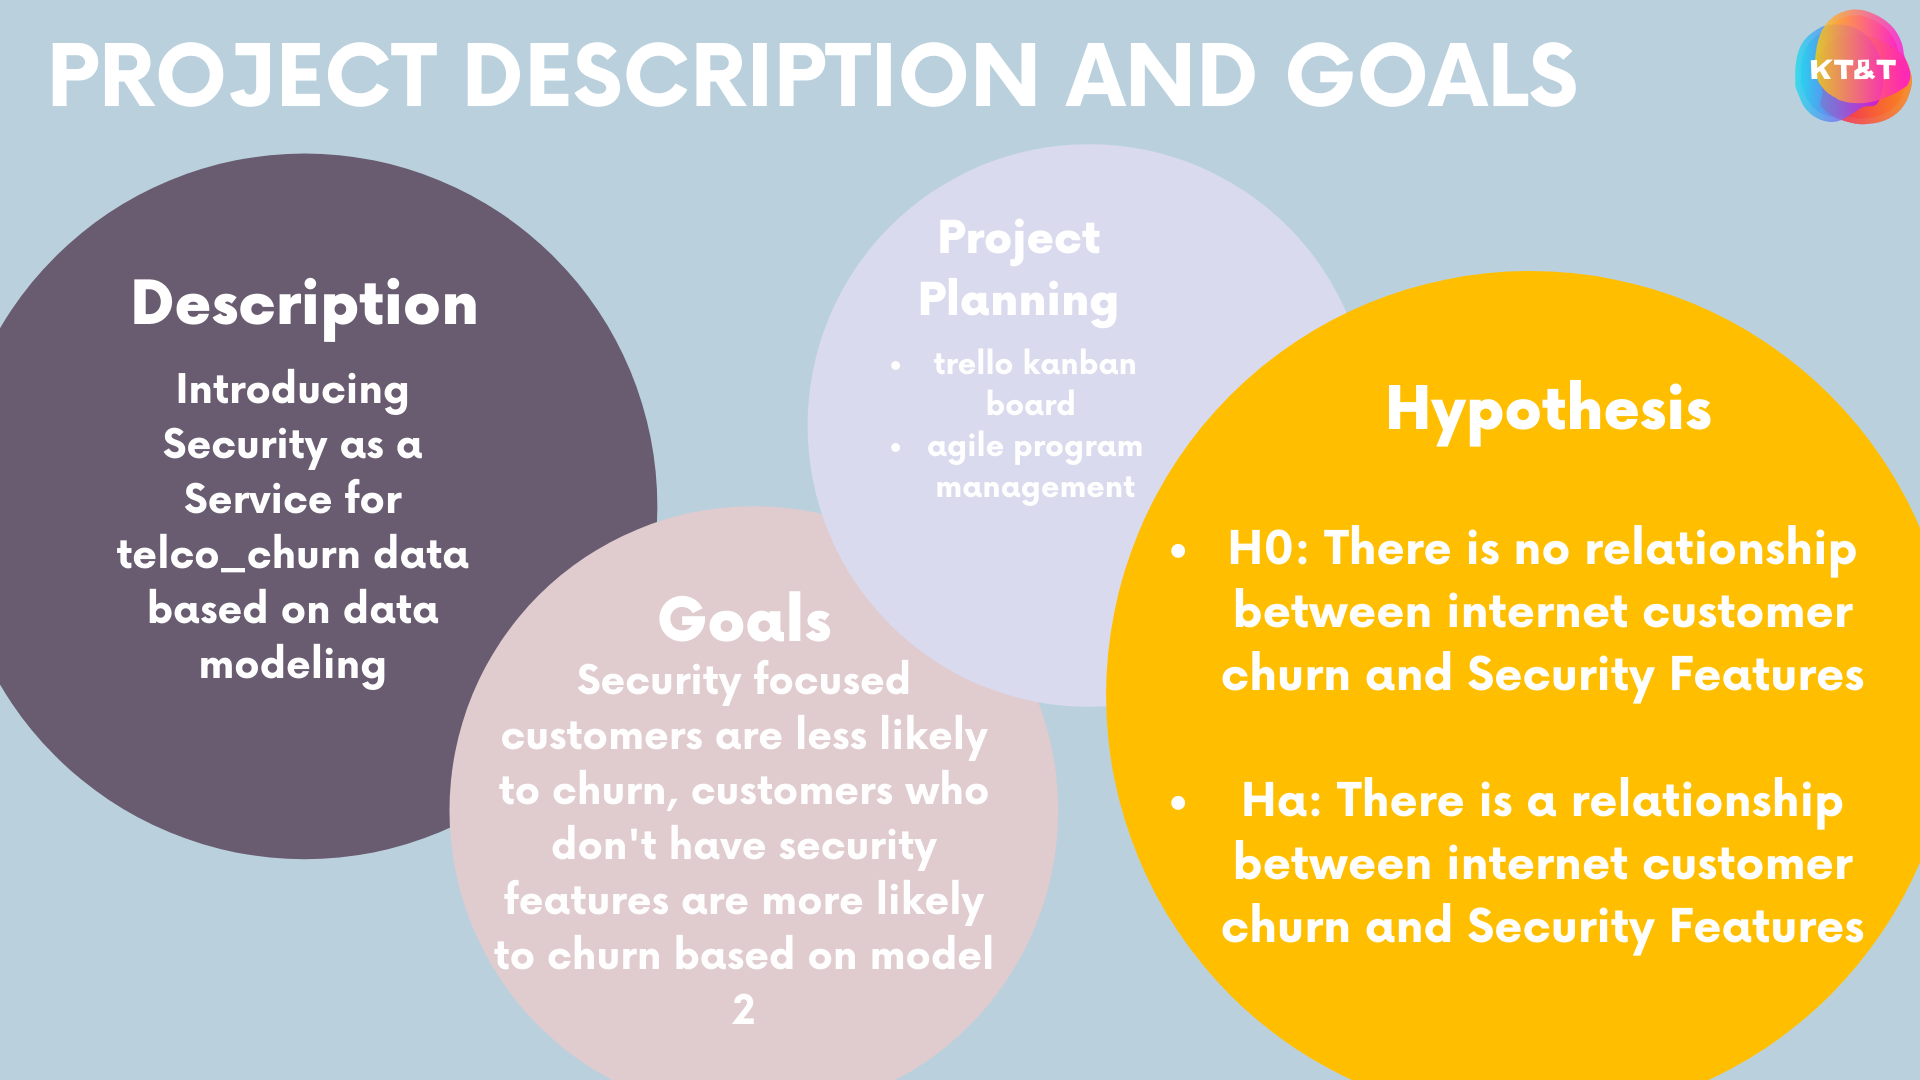

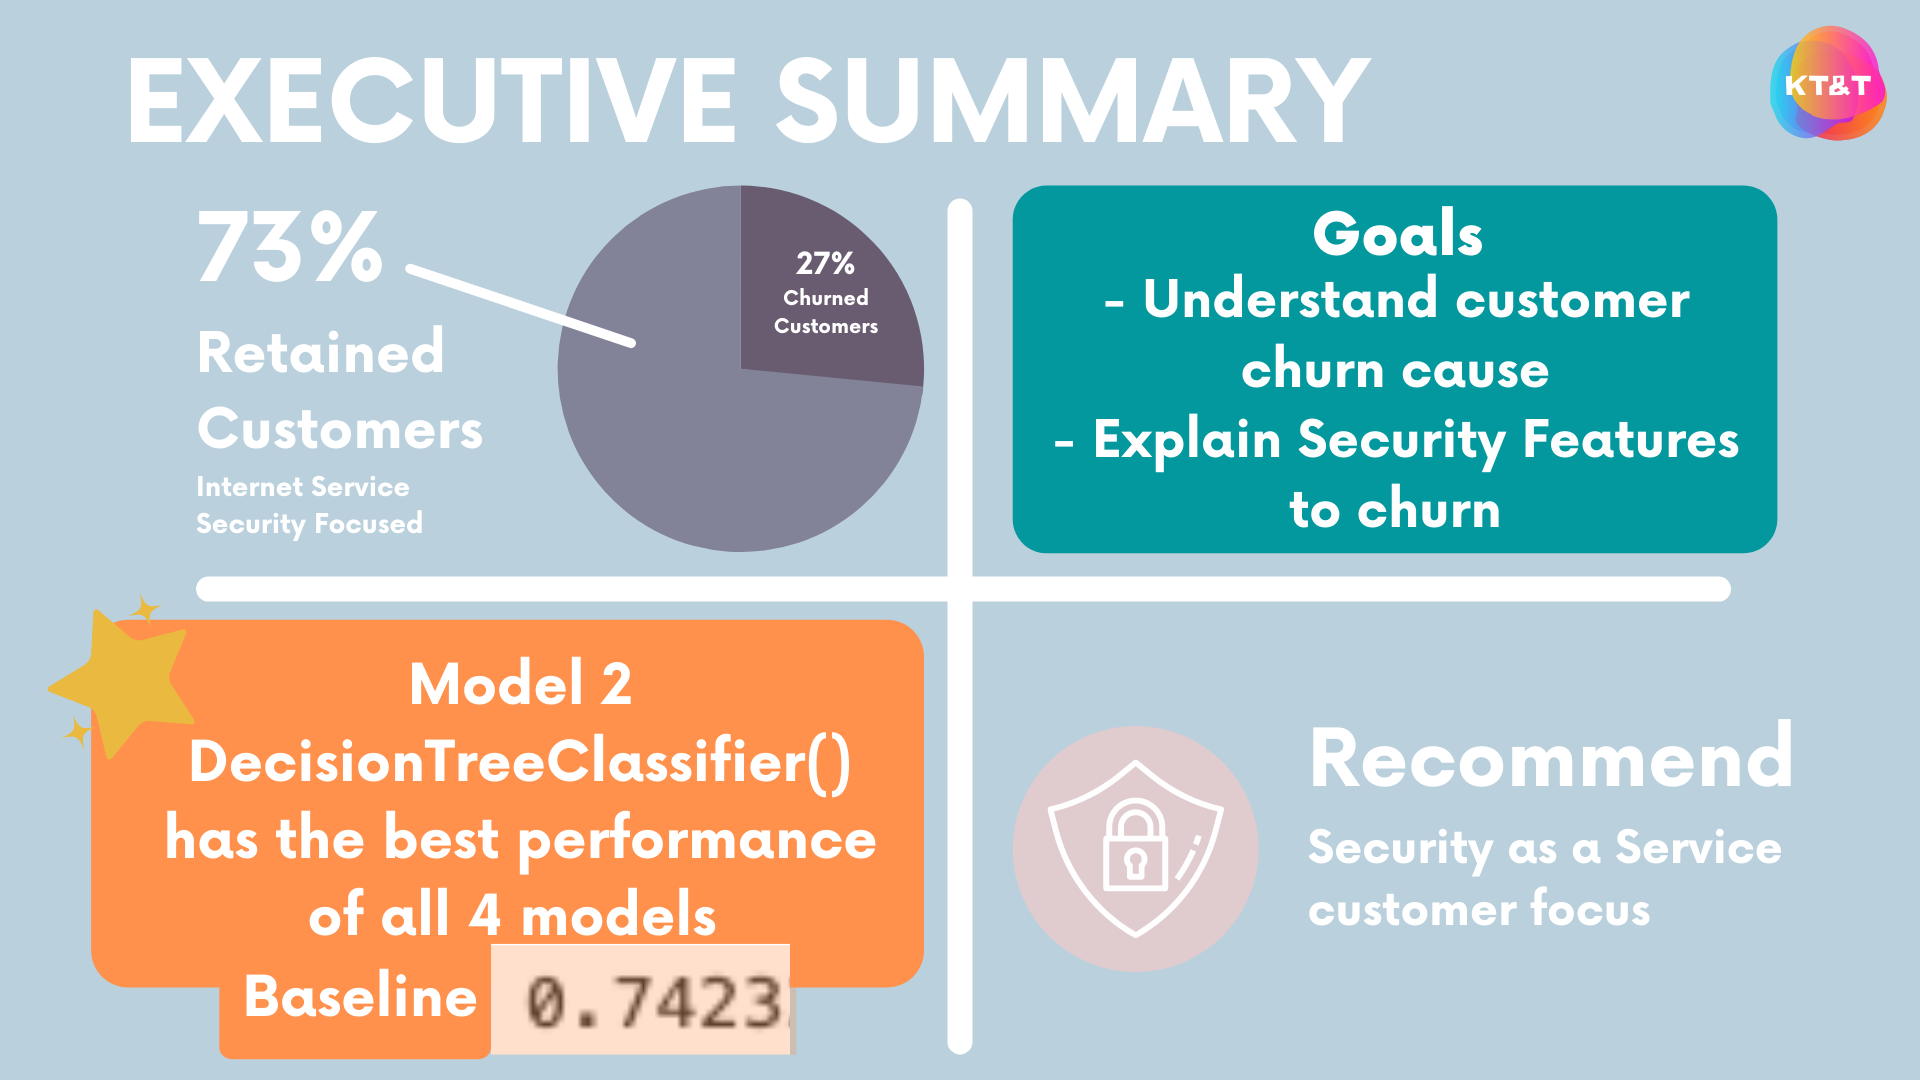

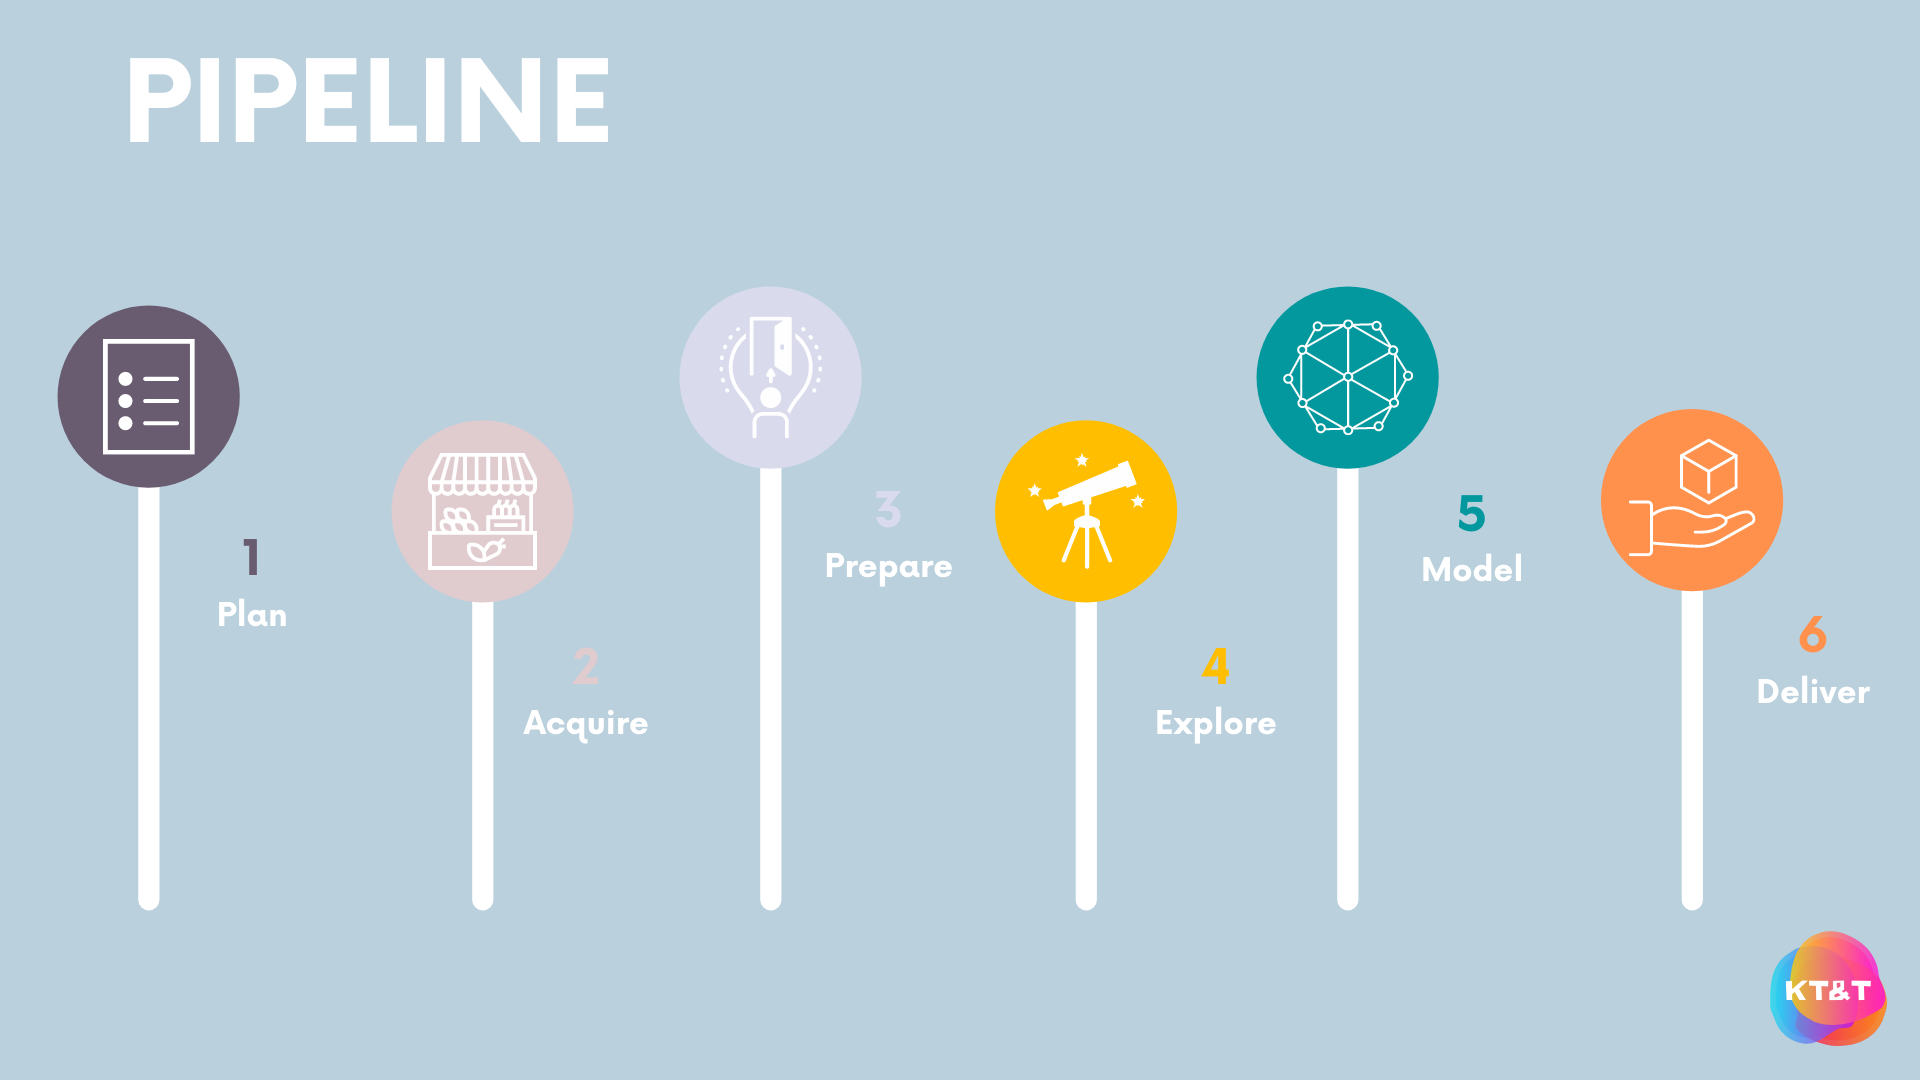

In [1]:
# set up our environment
import os
import acquire
import prepare
import explore
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.feature_selection as feat_select
import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
print('environment is ready')

environment is ready


# Plan
- Refer to trello kanban board for planning overview: https://trello.com/b/xqrSsjwa/telco-classification-project
- Utilized agile program management methodology 

# Acquire

In [2]:
# from the imported acquire file, call the 'read_telco_data' function 
from env import host, user, password
import acquire
df = acquire.read_telco_data()

In [3]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,Mailed check,DSL
1,1,4,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,Credit card (automatic),DSL
2,1,3,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,Bank transfer (automatic),DSL
3,1,4,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,Credit card (automatic),DSL
4,1,3,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,Bank transfer (automatic),DSL


In [4]:
df.shape

(7043, 24)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

<div class="alert alert-block alert-info"> <b>Note:</b> Our current df shape is: (7043, 24). We have a telco_churn dataframe, let us move on to prepare.</div>


# Prepare

In [7]:
# from the imported acquire file, call the 'read_telco_data' function
# shape is (7043, 24)
import prepare
df = acquire.read_telco_data()
df.shape

(7043, 24)

**Data Prepare**

In [8]:
# from the imported prepare file, call the helper functions to prepare data 
# prep_telco function
# shape = (7043,24)
prepare.prep_telco(df)
# create_tenure function: creating tenure year column, 
# shape = (7043,25)
prepare.create_tenure_year(df)
# is_churn function: Function used to create a new column for churn
prepare.is_churn(df)
# encode_all function: encodes columns into integers
# shape = (7043,26)
prepare.encode_all(df)
# security_features, backup_features, device_protection and encoding
# shape = (7043,29)
prepare.prep_telco_model(df)
df.shape
# security_features, backup_features, device_protection and encoding
# shape = (7043,29)
prepare.security_features(df)
prepare.backup_features(df)
prepare.device_protection_features(df)
prepare.encode_feature_columns(df)
df.shape

(7043, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   internet_service_type_id    7043 non-null   int64  
 1   payment_type_id             7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   customer_id                 7043 non-null   object 
 4   gender                      7043 non-null   object 
 5   senior_citizen              7043 non-null   int64  
 6   partner                     7043 non-null   object 
 7   dependents                  7043 non-null   object 
 8   tenure                      7043 non-null   int64  
 9   phone_service               7043 non-null   object 
 10  multiple_lines              7043 non-null   object 
 11  online_security             7043 non-null   object 
 12  online_backup               7043 non-null   object 
 13  device_protection           7043 

In [10]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,total_charges,churn,contract_type,payment_type,internet_service_type,tenure_years,is_churn,security_features,backup_features,device_protection_features
0,1,2,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,5957.90,No,Two year,Mailed check,DSL,5,0,1,1,1
1,1,4,3,0017-DINOC,Male,0,No,No,54,No,...,2460.55,No,Two year,Credit card (automatic),DSL,4,0,1,1,1
2,1,3,3,0019-GFNTW,Female,0,No,No,56,No,...,2560.10,No,Two year,Bank transfer (automatic),DSL,4,0,1,1,1
3,1,4,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,825.40,No,Two year,Credit card (automatic),DSL,1,0,1,1,1
4,1,3,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,6316.20,No,Two year,Bank transfer (automatic),DSL,6,0,1,1,1


<div class="alert alert-block alert-info"><b>Note:</b> Our prepare data now has 29 columns from the original dataset of 24 columns. Within our prepare file we added the 'create_tenure_year', features columns and 'is_churn' columns along wtih some data cleaning prep handling missing values and data integrity issues!</div>

**Data Train Test Split**

In [11]:
# Split data into Train, Validate, Test
# Target is churn
target = 'is_churn'
# categorical variables:
cat_vars = ['is_churn', 'internet_service_type_id','tenure', 'online_security','online_backup', 'device_protection', 'tech_support']
num_cols = df.columns[[df[col].dtype != 'O' for col in df.columns]]
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]] 

In [12]:
num_cols

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'tenure_years', 'is_churn', 'security_features', 'backup_features',
       'device_protection_features'],
      dtype='object')

In [13]:
# Random state is set & data is split within the function 
prepare.train_validate_test_split(df, target, seed=789)
print('prepare')

prepare


In [14]:
# Random state is set & data is split within the function 
prepare.test_train_split(df, stratify_value = 'churn')
print('prepare')

prepare


In [15]:
train, validate, test = prepare.train_validate_test_split(df, target, seed =789)
train.head
print('prepare')

prepare


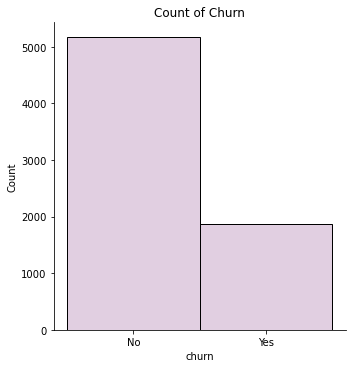

In [16]:
# Count of Churn
sns.displot(df, x="churn", color = 'thistle').set(title='Count of Churn')
plt.show()

In [17]:
# numeric columns in the dataset
num_cols

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'tenure_years', 'is_churn', 'security_features', 'backup_features',
       'device_protection_features'],
      dtype='object')

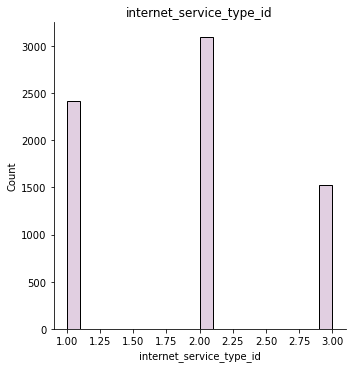

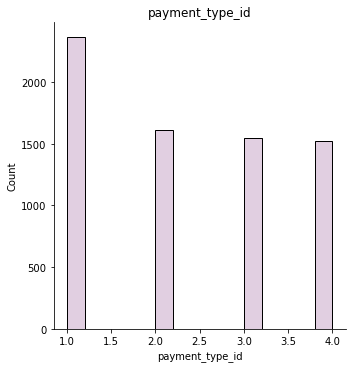

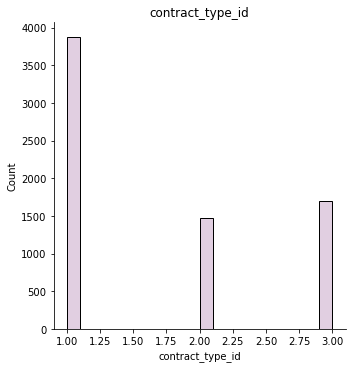

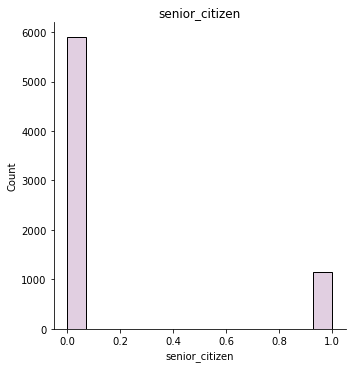

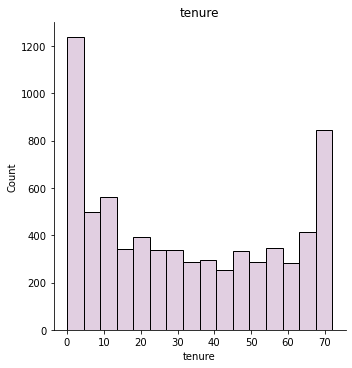

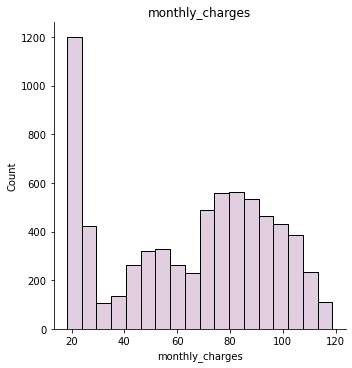

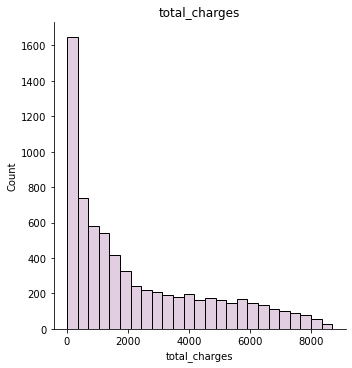

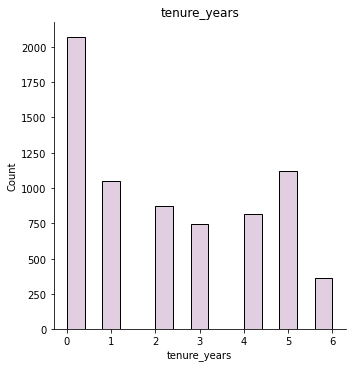

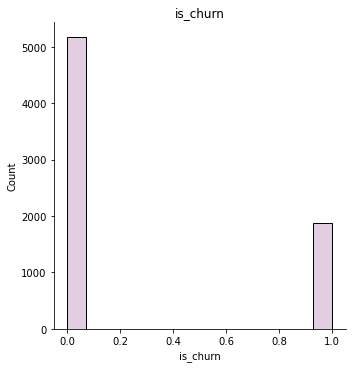

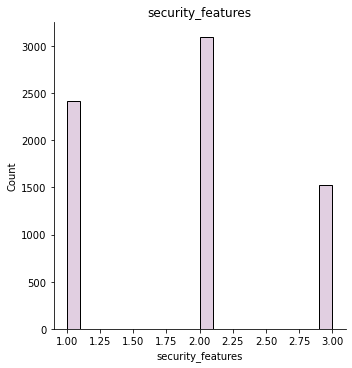

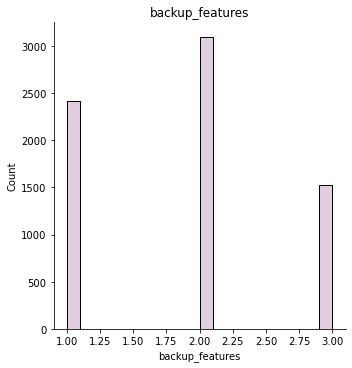

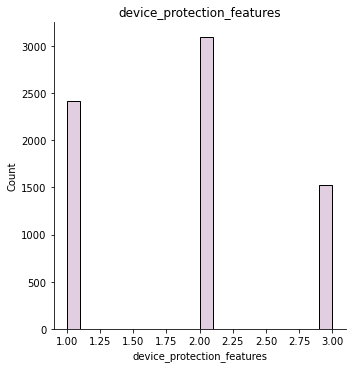

In [18]:
# Individual variable distributions are plotted for the numeric columns
for col in num_cols:
    sns.displot(df, x=df[col], color = 'thistle').set(title=col)
    plt.show()

In [19]:
# object columns in the dataset
obj_cols

Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'payment_type',
       'internet_service_type'],
      dtype='object')

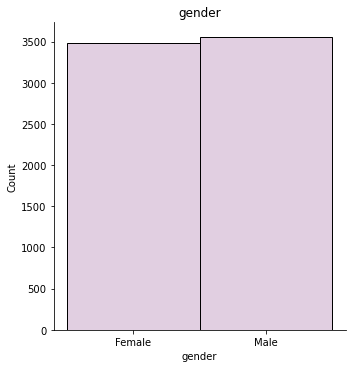

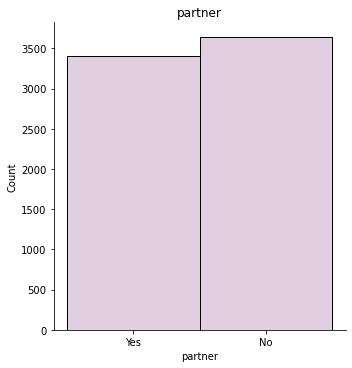

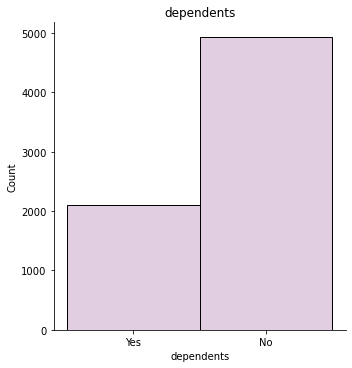

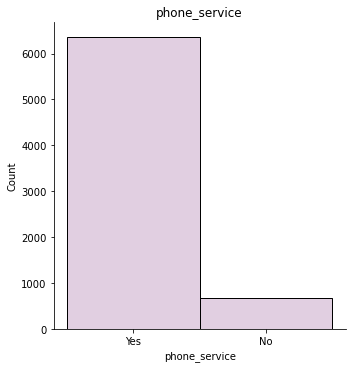

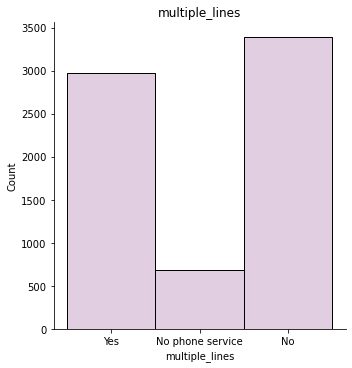

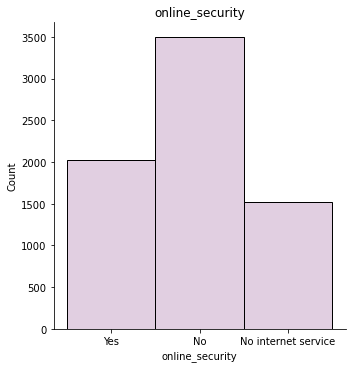

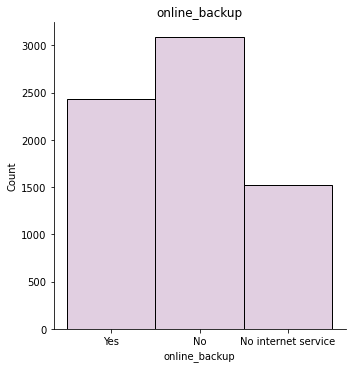

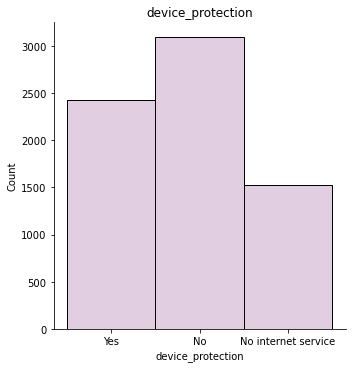

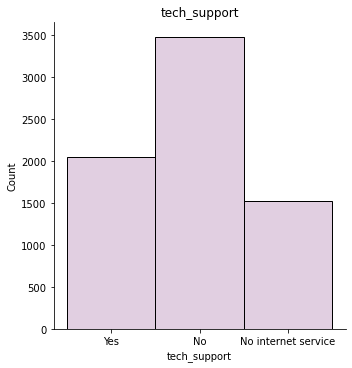

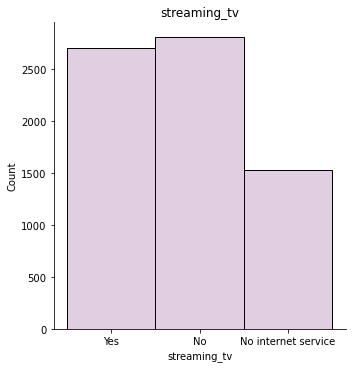

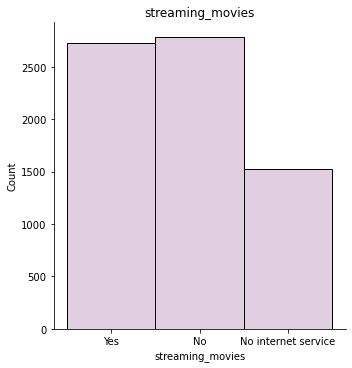

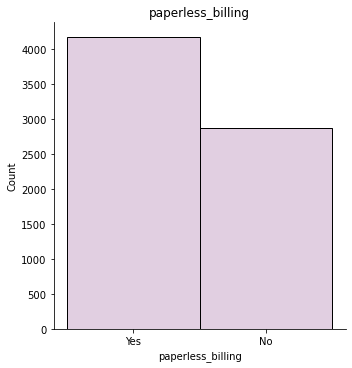

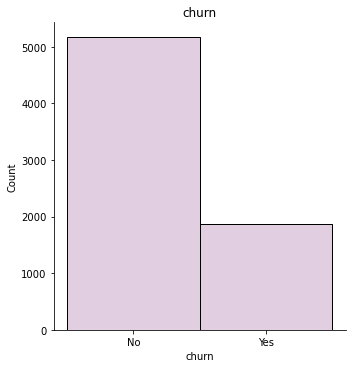

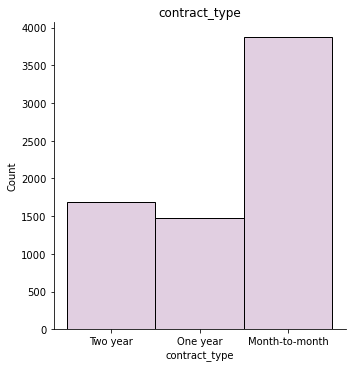

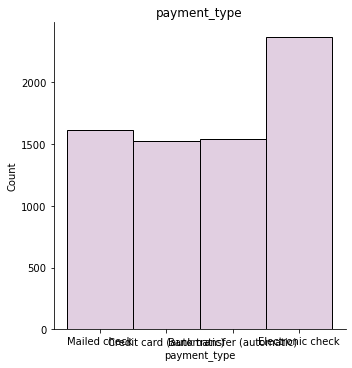

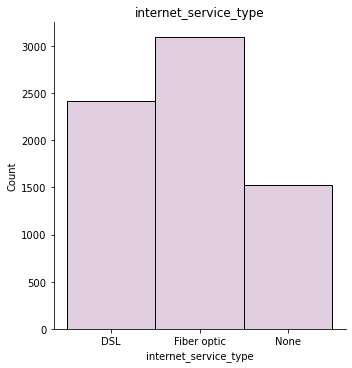

In [20]:
# Individual variable distributions are plotted for the object columns 
# skipping over customer as unique identifyers not needed to be plotted
for col in obj_cols:    
    if col == 'customer_id':
        continue
    sns.displot(df, x=df[col], color = 'thistle').set(title=col)
    plt.show()

**Takeaways and action items from Acquire**

<code style="background:yellow;color:black">Lots of data points (28 not including customer ID), thus need to narrow in within explore to understand how we can prevent churn.</code>

# Explore

**Hypothesis**
- $H0$: There is no relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

- $Ha$: There is a relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

# Statistical Tests:
- Univariate Stats
- Bivariate Stats
- Multivariate Stats & Analysis 

<div class="alert alert-block alert-info"><b>Note:</b> We will only focus on the following features within explore: internet_service_type_id, 'online_security','online_backup', 'device_protection', 'tech_support'. Version 1 Explore notes can be referred to in 'explore_v1.ipynb' within this repository.</div>

In [21]:
df.columns

Index(['internet_service_type_id', 'payment_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'payment_type',
       'internet_service_type', 'tenure_years', 'is_churn',
       'security_features', 'backup_features', 'device_protection_features'],
      dtype='object')

In [22]:
import prepare

In [23]:
target = 'is_churn'

In [24]:
prepare.train_validate_test_split(df, target, seed=789)
print('prepare')

prepare


In [25]:
train, validate, test = prepare.train_validate_test_split(df, target)
train.head
print('prepare')

prepare


In [26]:
print(train.shape, validate.shape, test.shape)

(3943, 29) (1691, 29) (1409, 29)


**Univariate Stats**

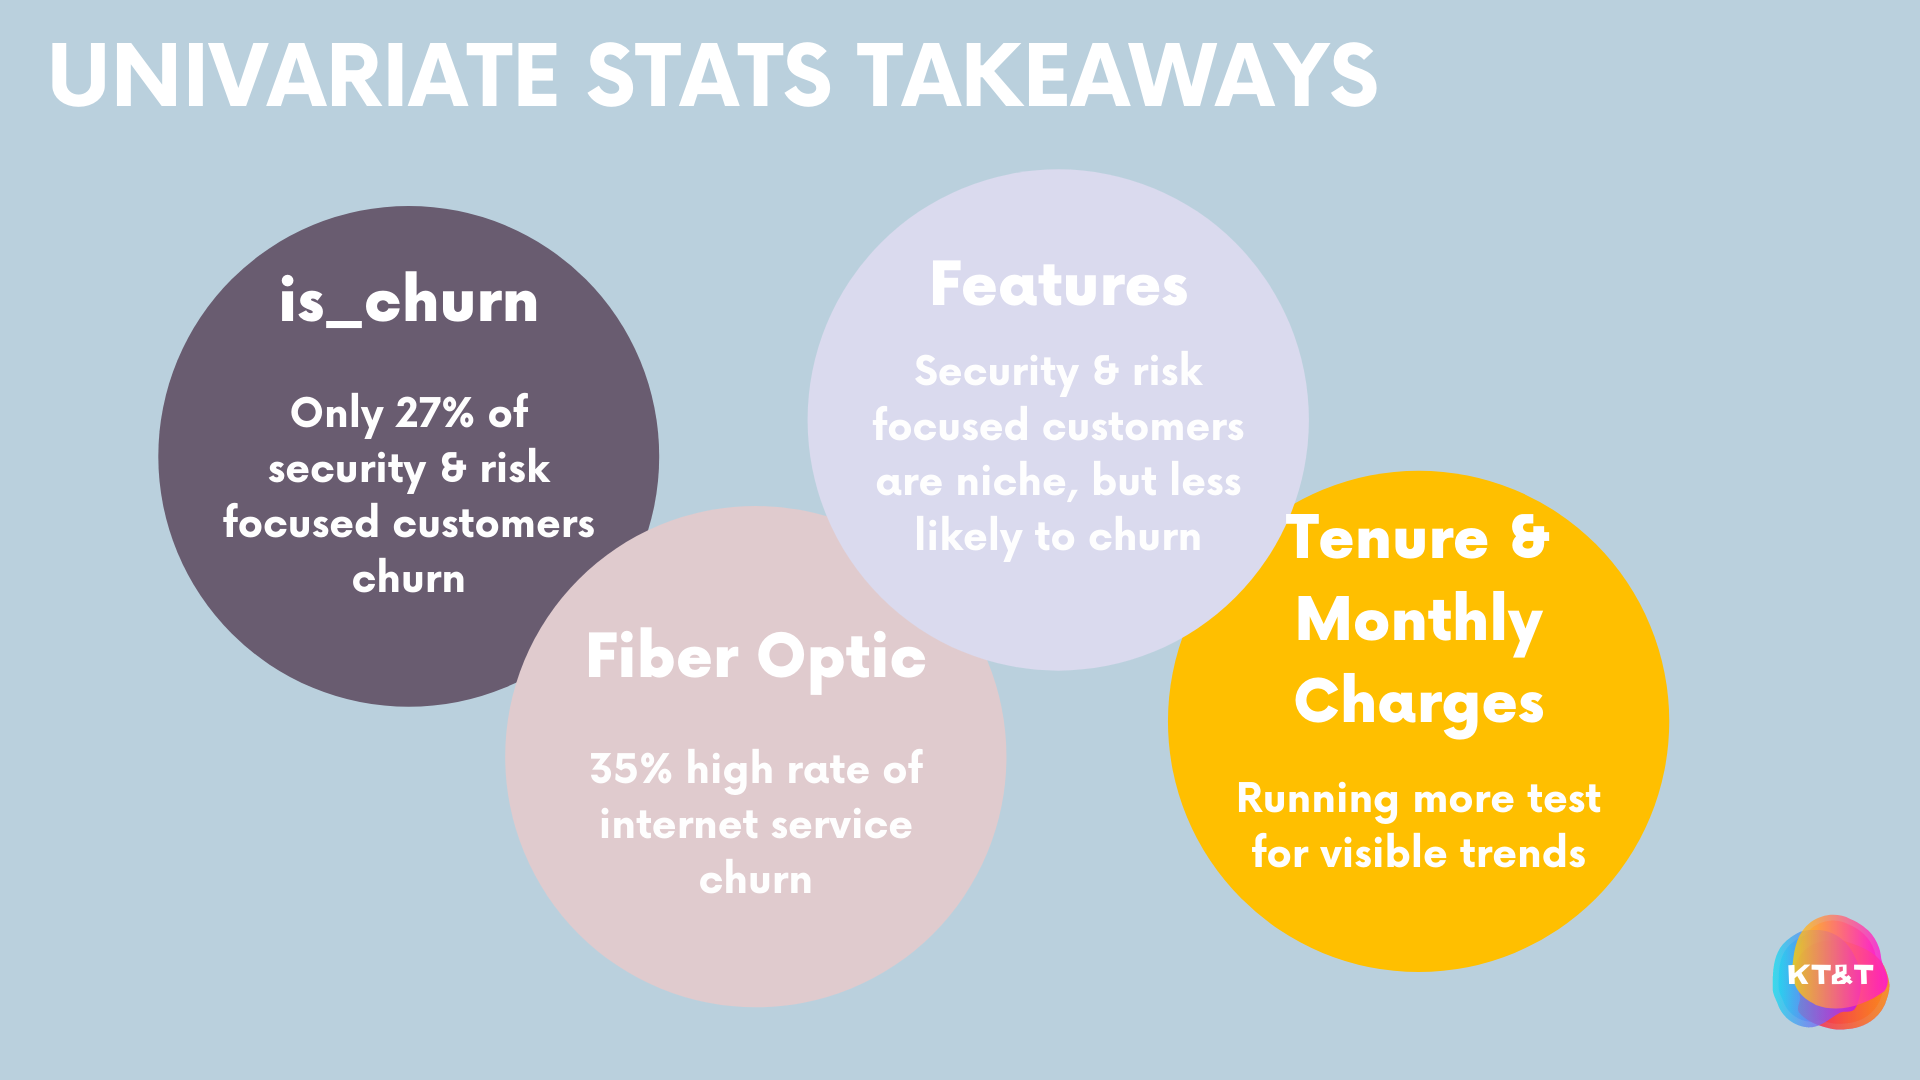

In [27]:
cat_vars = ['is_churn', 'internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support']
quant_vars = ['monthly_charges', 'tenure_years']
# not including 'total_charges'

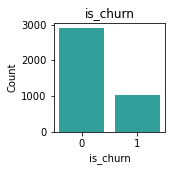

   is_churn  Count  Percent
0         0   2897    73.47
1         1   1046    26.53
_________________________________________________________________


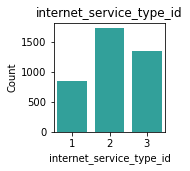

   internet_service_type_id  Count  Percent
2                         2   1733    43.95
1                         3   1359    34.47
3                         1    851    21.58
_________________________________________________________________


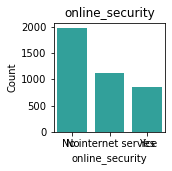

                         online_security  Count  Percent
No                                    No   1967    49.89
Yes                  No internet service   1125    28.53
No internet service                  Yes    851    21.58
_________________________________________________________________


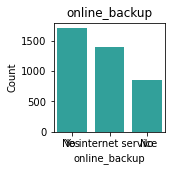

                           online_backup  Count  Percent
No                                   Yes   1703    43.19
Yes                  No internet service   1389    35.23
No internet service                   No    851    21.58
_________________________________________________________________


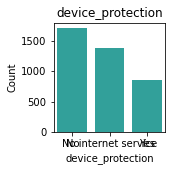

                       device_protection  Count  Percent
No                                    No   1712    43.42
Yes                  No internet service   1380    35.00
No internet service                  Yes    851    21.58
_________________________________________________________________


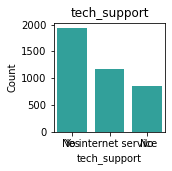

                            tech_support  Count  Percent
No                                   Yes   1929    48.92
Yes                  No internet service   1163    29.50
No internet service                   No    851    21.58
_________________________________________________________________


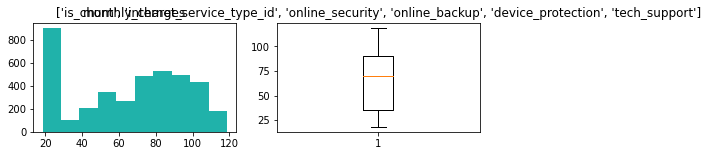

count    3943.000000
mean       65.028658
std        30.303196
min        18.400000
25%        35.650000
50%        70.450000
75%        90.275000
max       118.650000
Name: monthly_charges, dtype: float64


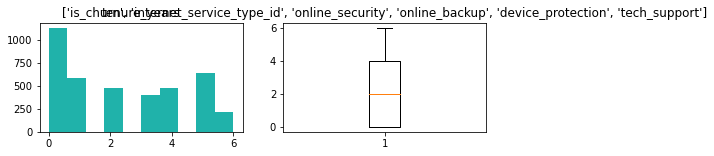

count    3943.000000
mean        2.330966
std         2.031655
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: tenure_years, dtype: float64


In [28]:
explore.explore_univariate(train, cat_vars, quant_vars)

**Univariate Stats High Level Takeaways** 

**Univariate Stats**

Detailed Takeaways & Actions: 
- is_churn   
    **- 27% of users churn**
     - 73% of users do not churn
     
- internet_service_type_id
    - 44% 3: NO internet service type
    - 35% 2: Fiber Optic (1365)
    - 21% 1: DSL (838)

Security focused customer features: 
**Security & risk focused customers are niche, but less likely to churn**
- 'online_security'
    - 50% NO internet service (1956)
    - 29% NO online_security (1149)
    - 21% YES online security (838)
   
- 'online_backup'
    - 43% NO internet service (1703)
    - 36% NO online_backup (1402)
    - 21% YES online_backup (838)
    
- 'device_protection'
    - 43% NO internet service (1696)
    - 21% NO device_protection (838)
    - 36% YES device_protection (1409)
    
- 'tech_support'
    - 48% NO internet service (1921)
    - 30% NO tech support (1184)
    - 21% YES techsupport (838)
    
- tenure / monthly charges
    - All over the place, but could be relevant down the line
    - Running more test for visibile trends

**Bivariate Stats** 

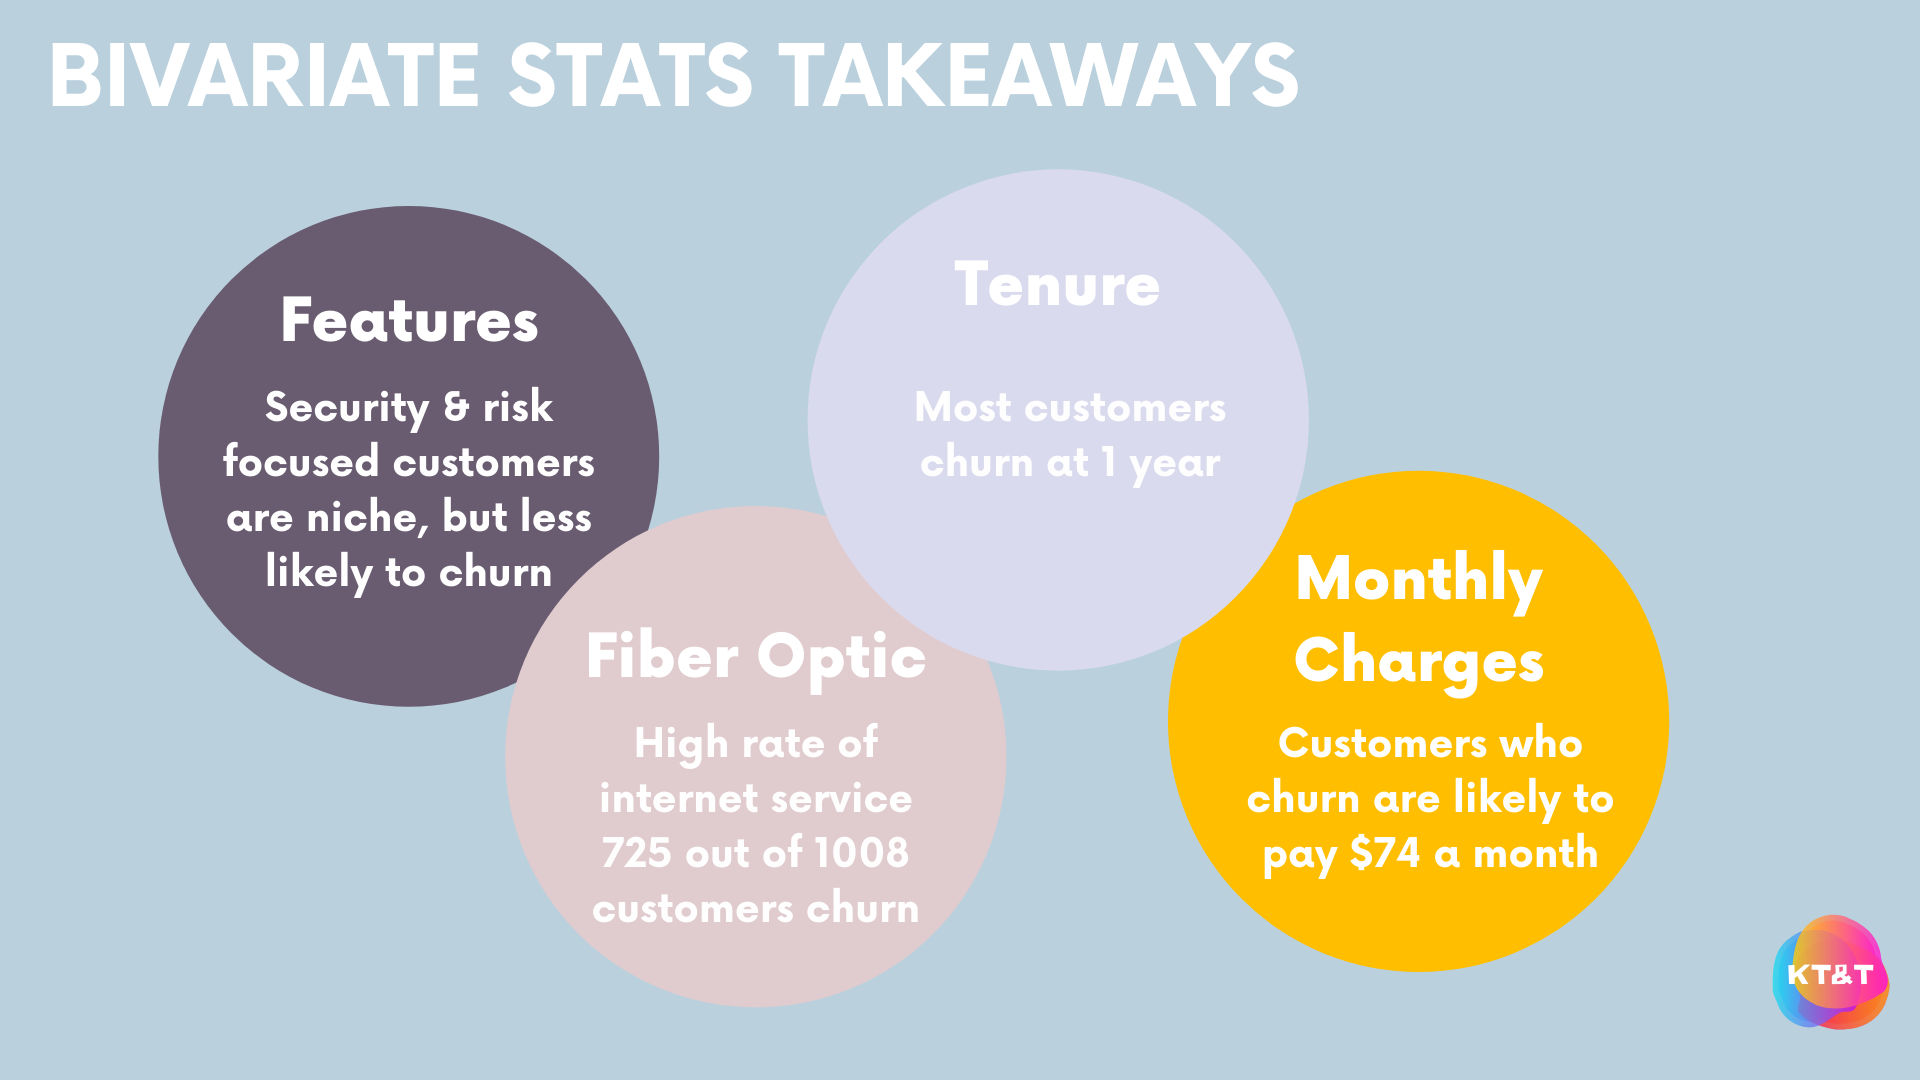

In [29]:
cat_vars = 'is_churn', 'internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support'
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

In [30]:
cat_vars = cat_vars[1:]
cat_vars

('internet_service_type_id',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support')

internet_service_type_id 
_____________________

         chi2       p-value  degrees of freedom
0  417.839957  1.850147e-91                   2

observed:
 is_churn                     0     1   All
internet_service_type_id                  
1                         1093   266  1359
2                         1008   725  1733
3                          796    55   851
All                       2897  1046  3943

expected:
              0           1
0   998.484149  360.515851
1  1273.269338  459.730662
2   625.246513  225.753487


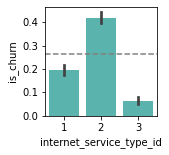


_____________________

online_security 
_____________________

         chi2        p-value  degrees of freedom
0  530.066893  7.896536e-116                   2

observed:
 is_churn                0     1   All
online_security                      
No                   1130   837  1967
No internet service   796    55   851
Yes                   971   154  1125
All                  2897  1046  3943

expected:
              0           1
0  1445.193761  521.806239
1   625.246513  225.753487
2   826.559726  298.440274


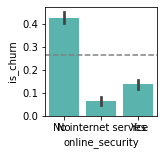


_____________________

online_backup 
_____________________

         chi2       p-value  degrees of freedom
0  375.426493  3.000357e-82                   2

observed:
 is_churn                0     1   All
online_backup                        
No                   1007   696  1703
No internet service   796    55   851
Yes                  1094   295  1389
All                  2897  1046  3943

expected:
              0           1
0  1251.227745  451.772255
1   625.246513  225.753487
2  1020.525742  368.474258


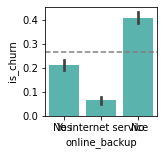


_____________________

device_protection 
_____________________

         chi2       p-value  degrees of freedom
0  358.223821  1.631870e-78                   2

observed:
 is_churn                0     1   All
device_protection                    
No                   1022   690  1712
No internet service   796    55   851
Yes                  1079   301  1380
All                  2897  1046  3943

expected:
              0           1
0  1257.840223  454.159777
1   625.246513  225.753487
2  1013.913264  366.086736


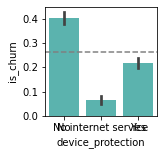


_____________________

tech_support 
_____________________

         chi2        p-value  degrees of freedom
0  523.507787  2.097628e-114                   2

observed:
 is_churn                0     1   All
tech_support                         
No                   1105   824  1929
No internet service   796    55   851
Yes                   996   167  1163
All                  2897  1046  3943

expected:
              0           1
0  1417.274410  511.725590
1   625.246513  225.753487
2   854.479077  308.520923


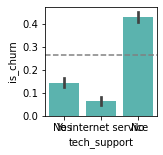


_____________________

monthly_charges 
____________________

           count       mean        std   min     25%     50%      75%     max
is_churn                                                                     
0         2897.0  61.555644  31.459796  18.4  24.950  64.400  89.2000  118.65
1         1046.0  74.647514  24.395607  19.0  56.175  79.725  94.2375  117.80 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1158736.5, pvalue=1.419188321486284e-29)

____________________

tenure_years 
____________________

           count      mean       std  min  25%  50%  75%  max
is_churn                                                     
0         2897.0  2.751122  2.017325  0.0  1.0  3.0  5.0  6.0
1         1046.0  1.167304  1.564475  0.0  0.0  0.0  2.0  6.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2200654.5, pvalue=1.784708714489754e-108)

____________________



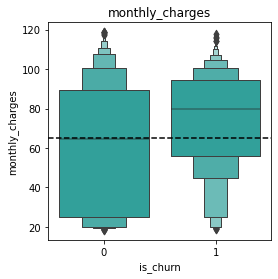

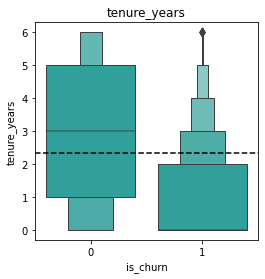

In [31]:
explore.explore_bivariate(train, 'is_churn', cat_vars, quant_vars)

Bivariate Stats
Detailed Takeaways & Actions: 

Significant takeaways: 

     
- internet_service_type_id: 
    - 3: NO internet service type -> 55 users are churning that don't have internet service
    - 2: Fiber Optic -> 725 users are churning that have fiber optic
    - 1: DSL -> 266 users are churning that have DSL


Features: 
- 'online_security'
    - NO online_security 837 churn SIGNIFICANT
    - NO internet service 55 churn
    - YES online security ONLY 154 churned SIGNIFICANT 
   
- 'online_backup'
    - NO online_backup 696 churned SIGNIFICANT
    - NO internet service 55 churned
    - YES online_backup only 295 churned SIGNIFICANT
    
- 'device_protection'
    - NO device_protection 690 churned SIGNIFICANT
    - NO internet service 55 churned
    - YES device_protection ONLY 301 churned SIGNIFICANT
    
- 'tech_support'
    - NO tech support 824 churned
    - NO internet service 55 churned
    - YES techsupport ONLY 167 users churned SIGNIFICANT 
    

- Tenure
    - Most customers churn at 1.16 years
    - Most customers who do not churn have been with KT&T for 2.75 years

- Monthly Charges
    - 74 is the most likely charge for cutomers who churn
    - 61 is the most likely charge for cutomers who stay with KT&T and do not churn

**Multivariate Stats & Analysis**

In [32]:
print(train.shape, validate.shape, test.shape)

(3943, 29) (1691, 29) (1409, 29)


In [33]:
cat_vars = 'is_churn', 'internet_service_type_id', 'online_security','online_backup', 'device_protection', 'tech_support'
quant_vars = 'monthly_charges', 'tenure_years'
# not including 'total_charges'

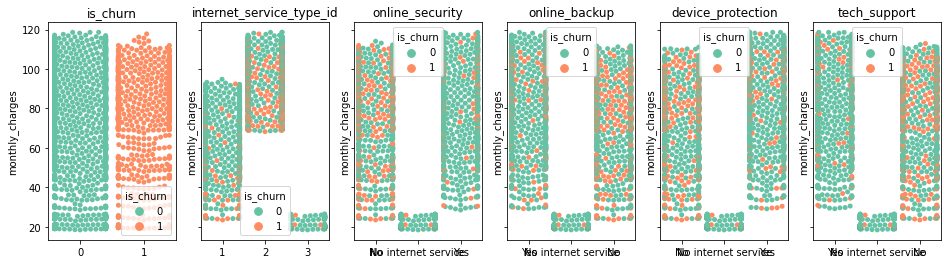

In [ ]:
explore.explore_multivariate(train, target, cat_vars, quant_vars)

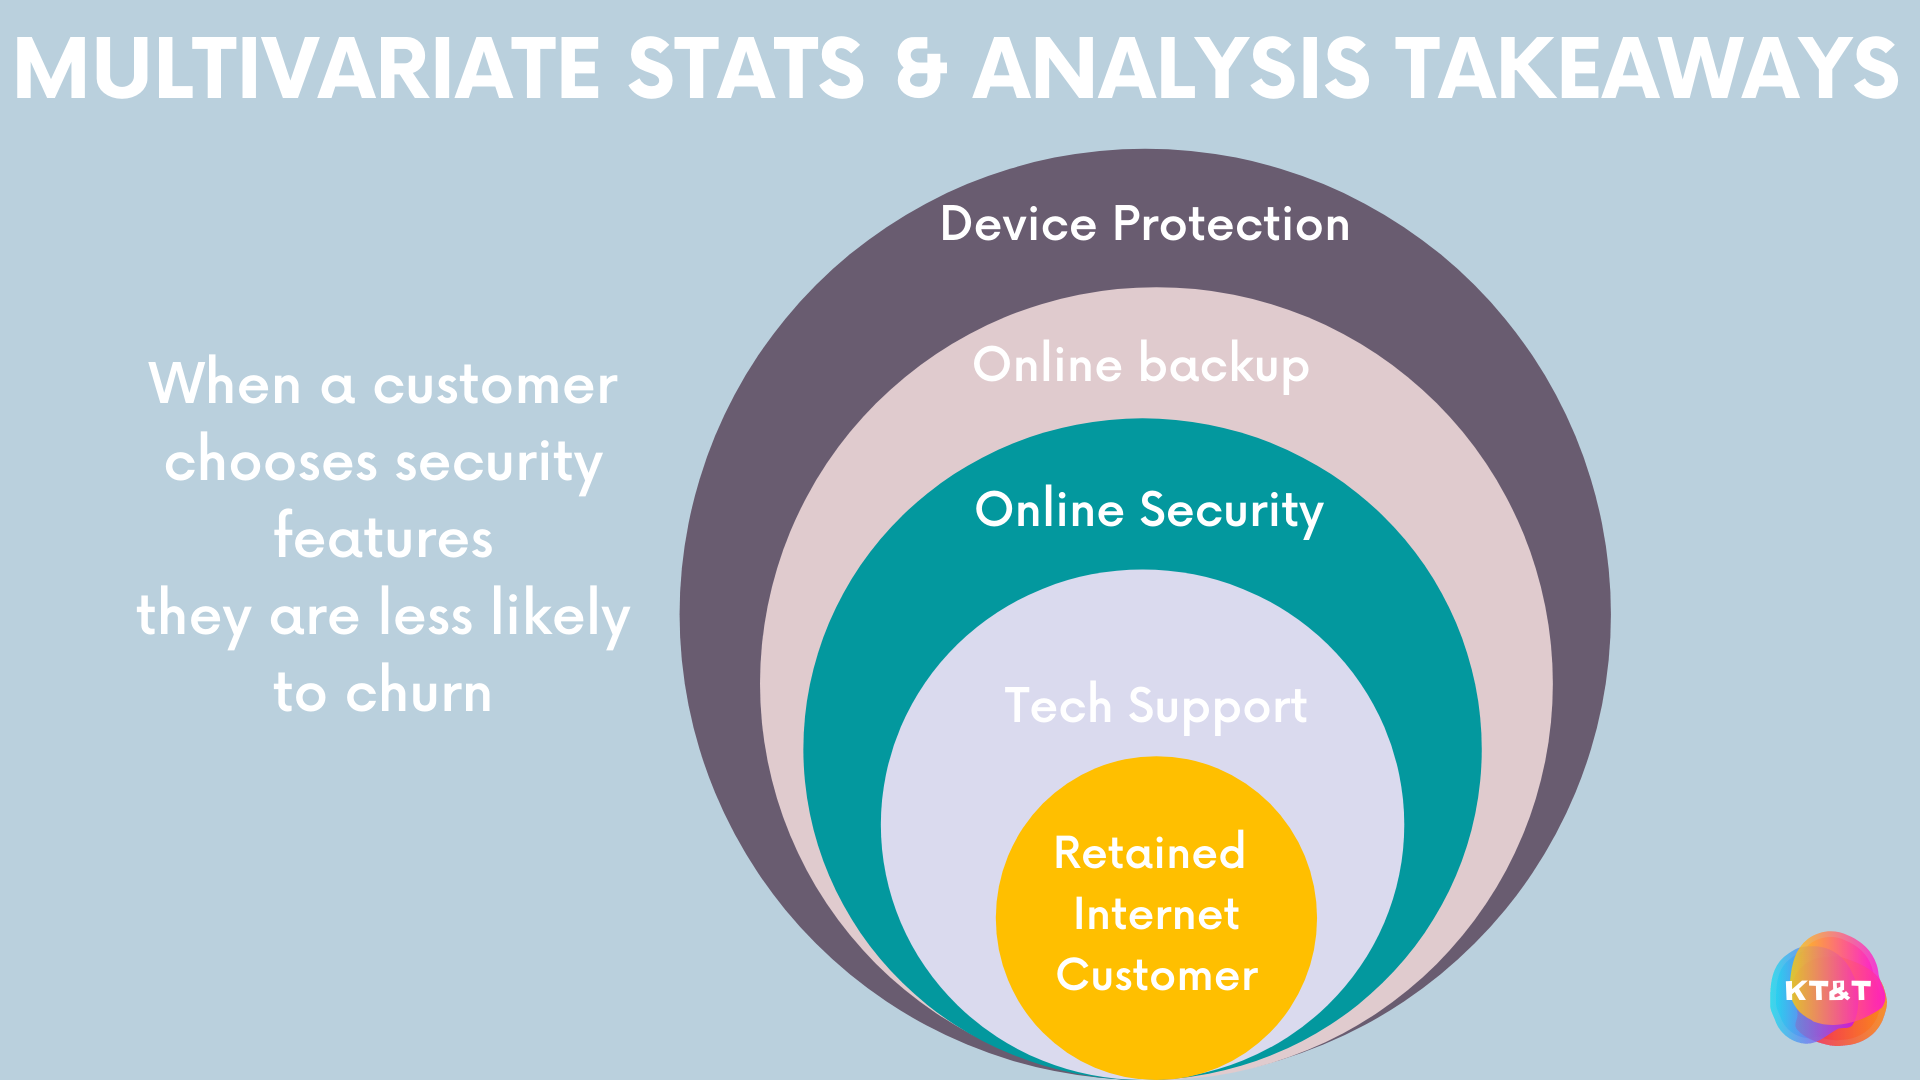

- Multivariate Stats & Analysis Takeaways & Actions Detailed: 
When a customer chooses: online security, online_backup, device_protection and tech_support they are less likely to churn. These customers are assumed to be risk adverse. 

# Modeling

**Hypothesis**
- $H0$: There is no relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

- $Ha$: There is a relationship between internet customer churn and the following addtional features:  online_security, online_backup, device_protection, tech_support.

    - **True Positive**: Predict there is a relationship and there is a relationship

    - **True Negative**:Predict there is no relationship and there is not relationship

    - **False Positive**: Predict there is a relationship and there is no relationship

    - **False Negative**: Predict there is no relationship and there is a relationship

In [ ]:
# split data for the model
train, test = train_test_split(df, test_size=.2, random_state=789)
train, validate = train_test_split(train, test_size=.3, random_state=789)

In [ ]:
# specify columns to use for the model with focus on risk and security
X_col= ['internet_service_type_id', 'security_features', 'backup_features', 'device_protection_features']
y_col= 'is_churn'

In [ ]:
# specify train, validate, test
X_train = train[X_col]
y_train= train[y_col]

X_validate = validate[X_col]
y_validate= validate[y_col]

X_test = test[X_col]
y_test= test[y_col]

In [ ]:
# shape of train set
X_train.shape, y_train.shape

In [ ]:
# designate our X and y
X = X_train
y = y_train

In [ ]:
# shapes size
train.shape, validate.shape, test.shape

In [ ]:
# create baseline
train['baseline'] = 0

In [ ]:
# obtain accuracy score for baseline
accuracy_score(train.is_churn, train.baseline)

<code style="background:yellow;color:black">Baseline accuracy for no customers churning is 74% when model is focused on internet service risk and security features.</code>

# Model I: Random Forest

In [ ]:
# drop out non-numerical columns or non-encoded version remaining in this data set
# Note convereted the security features as int64 and dropping the object column versions
drops = ['payment_type_id', 'contract_type_id',
        'senior_citizen', 'tenure', 'customer_id', 'gender', 'partner', 'dependents', 'phone_service',
        'multiple_lines','streaming_tv', 'streaming_movies',
        'paperless_billing', 'online_security', 'online_backup', 
       'device_protection', 'tech_support', 'churn', 'contract_type', 'payment_type', 'internet_service_type'
       ]
# , 'total_charges', 'tenure_years', 'internet_service_type_id'

In [ ]:
for dataset in [train, validate, test]:
    dataset.drop(columns=drops, inplace=True)

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
train.info()

In [ ]:
train.head()

In [ ]:
# Baseline is 74%
baseline = (y_train.value_counts().idxmax() == y_train).mean()
baseline

In [ ]:
# create the Random Forest Model
clf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=789)

In [ ]:
# fit the model after splitting our X and y
X_train, y_train = train.drop(columns='is_churn'), train.is_churn

In [ ]:
# fit the thing
clf1.fit(X_train, y_train)

In [ ]:
# use the thing
y_pred = clf1.predict(X_train)

In [ ]:
X_val, y_val = validate.drop(columns='is_churn'), validate.is_churn

In [ ]:
conf1 = confusion_matrix(y_train, y_pred)
conf1

In [ ]:
clf1.predict_proba(X_train)

In [ ]:
my_preds = clf1.predict_proba(X_train)[:,1]
my_preds < .7

In [ ]:
# turn our confusion matrix into a dataframe for human legibility
conf1 = pd.DataFrame(conf1, columns=['predict_churn', 'predict_no_churn'], index=['actual_churn', 'actual_no_churn'])
conf1
rubric_df1 = pd.DataFrame([['true negative', 'false positive'],['false negative', 'true positive']], columns=['predict_churn', 'predict_no_churn'], index=['actual_churn', 'actual_no_churn'])
rubric_df1
joined = pd.concat([conf1, rubric_df1], axis=1)
rubric_df1 + ': ' + conf1.values.astype(str)

In [ ]:
# designate our X and y
X = X_train
y = y_train

In [ ]:
accuracy = clf1.score(X, y)
y_pred = clf1.predict(X)
conf1 = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report

# Model II & III Decision Tree Classifier

In [ ]:
# We will be attempting to make a Decision Tree Classifier Model that will predict churn on the 
# telco_churn data that performs better than the baseline (74%)

In [ ]:
# obtain our mode
train.is_churn.value_counts()

In [ ]:
train.baseline.head()

In [ ]:
print(f'Our baseline accuracy for no churn on the telco_churn data set is {(train.baseline == train.is_churn).mean():.3}')

In [ ]:
# create the model with max leaf nodes
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

In [ ]:
# remove baseline assumption from the train
train.drop(columns='baseline', inplace=True)

In [ ]:
# split our X and y
X_train = train.drop(columns='is_churn')
y_train = train[['is_churn']]

In [ ]:
# fit the model
clf2.fit(X_train, y_train)

In [ ]:
type(clf2)

In [ ]:
# designate our X and y
X = X_train
y = y_train

In [ ]:
# model 2
accuracy = clf2.score(X, y)
y_pred = clf2.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report

In [ ]:
# use the model to predict
y_pred = clf2.predict(X_train)

In [ ]:
# check out the values in the predictions
pd.Series(y_pred).value_counts()

In [ ]:
# model score: accuracy

In [ ]:
accuracy2 = clf2.score(X_train, y_train)
accuracy2

In [ ]:
# confusion matrix
conf2 = confusion_matrix(y_train, y_pred)
conf2

In [ ]:
# get the classification report
class_report2 = classification_report(y_train, y_pred, output_dict=True)
class_report2

In [ ]:
pd.DataFrame(class_report2).rename(columns={'0': 'is_churn', '1': 'no_churn'}).T

In [ ]:
# turn our confusion matrix into a dataframe for human legibility
conf_df2 = pd.DataFrame(conf, columns=['predict_churn', 'predict_no_churn'], index=['actual_churn', 'actual_no_churn'])
conf_df2
rubric_df2 = pd.DataFrame([['true negative', 'false positive'],['false negative', 'true positive']], columns=['predict_churn', 'predict_no_churn'], index=['actual_churn', 'actual_no_churn'])
rubric_df2
joined = pd.concat([conf_df2, rubric_df2], axis=1)
rubric_df2 + ': ' + conf_df2.values.astype(str)

In [ ]:
# clf3
clf3 = DecisionTreeClassifier(max_depth=3)

In [ ]:
# fit the model
clf3.fit(X_train, y_train)

In [ ]:
# use the model to predict
y_pred3 = clf3.predict(X_train)

In [ ]:
# check out the values in the predictions
pd.Series(y_pred3).value_counts()

In [ ]:
# model score accuracy
accuracy3 = clf3.score(X_train, y_train)
accuracy3

In [ ]:
# confusion matrix
conf3 = confusion_matrix(y_train, y_pred)
conf3

In [ ]:
y_pred = clf3.predict(X_train)

In [ ]:
# Model #3:
accuracy = clf3.score(X, y)
y_pred = clf3.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report

In [ ]:
# turn our confusion matrix into a dataframe for human legibility
conf_df3 = pd.DataFrame(conf, columns=['predict_churn', 'predict_no_churn'], index=['actual_churn', 'actual_no_churn'])
conf_df3
rubric_df3 = pd.DataFrame([['true negative', 'false positive'],['false negative', 'true positive']], columns=['predict_churn', 'predict_no_churn'], index=['actual_churn', 'actual_no_churn'])
rubric_df3
joined = pd.concat([conf_df3, rubric_df3], axis=1)
rubric_df3 + ': ' + conf_df3.values.astype(str)

# Model IV KT&T Nearest Neighbors Classifier (KNN)

In [ ]:
train.columns

In [ ]:
# columns for KNN model
X_cols = ['internet_service_type_id', 'monthly_charges', 'total_charges',
       'tenure_years', 'security_features', 'backup_features',
       'device_protection_features']

# target to see if customers who choose security features stay longer and don't churn
y_col = 'is_churn'

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prepare.X_train_function(X_cols, y_col, train, validate, test)

In [ ]:
model4 = KNeighborsClassifier(n_neighbors=4)
model4.fit(X_train, y_train)

In [ ]:
# use the model to predict
y_pred = model4.predict(X_train)
y_pred

In [ ]:
# check out the values in the predictions
pd.Series(y_pred).value_counts()

In [ ]:
# model score: accuracy
accuracy4 = model4.score(X_train, y_train)
accuracy4

In [ ]:
# confusion matrix
conf4 = confusion_matrix(y_train, y_pred)

In [ ]:
# get the classification report
class_report4 = classification_report(y_train, y_pred, output_dict=True)

In [ ]:
# Model #4:
accuracy = model4.score(X, y)
y_pred = model4.predict(X)
conf = confusion_matrix(y, y_pred)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()
print(f'''
The accuracy for our model is {accuracy:.4}
The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
''')
class_report

# Model Evaluation Takeaways: 

- **Baseline is 0.64**

- Model 1: Random Forest: 
    - 0.86 Accuracy
    - 0.64 True Positive
    - 0.52 False Positive
    - 0.94 True Negative  
    - 0.35 False Negative 

- Model 2: Decision Tree(): **Best Performer** perhaps due to no depth limitations?
    - 0.99 Accuracy
    - 0.97 True Positive
    - 0.00273 False Positive: 
    - 0.99 True Negative  
    - 0.02 False Negative  
    
- Model 3: Decision Tree(max_depth=3): **Worst Performer** perhaps due to depth limitations?
    - 0.79 Accuracy
    - 0.34 True Positive
    - 0.05 False Positive: 
    - 0.94 True Negative  
    - 0.65 False Negative
    
- Model 4: KT&T Nearest Neighbors (KNN): 
    - 0.82 Accuracy
    - 0.42 True Positive
    - 0.03 False Positive: 
    - 0.96 True Negative  
    - 0.57 False Negative  

<code style="background:yellow;color:black">Baseline accuracy for no customers churning is 74% when model is focused on internet service risk and security features.</code>

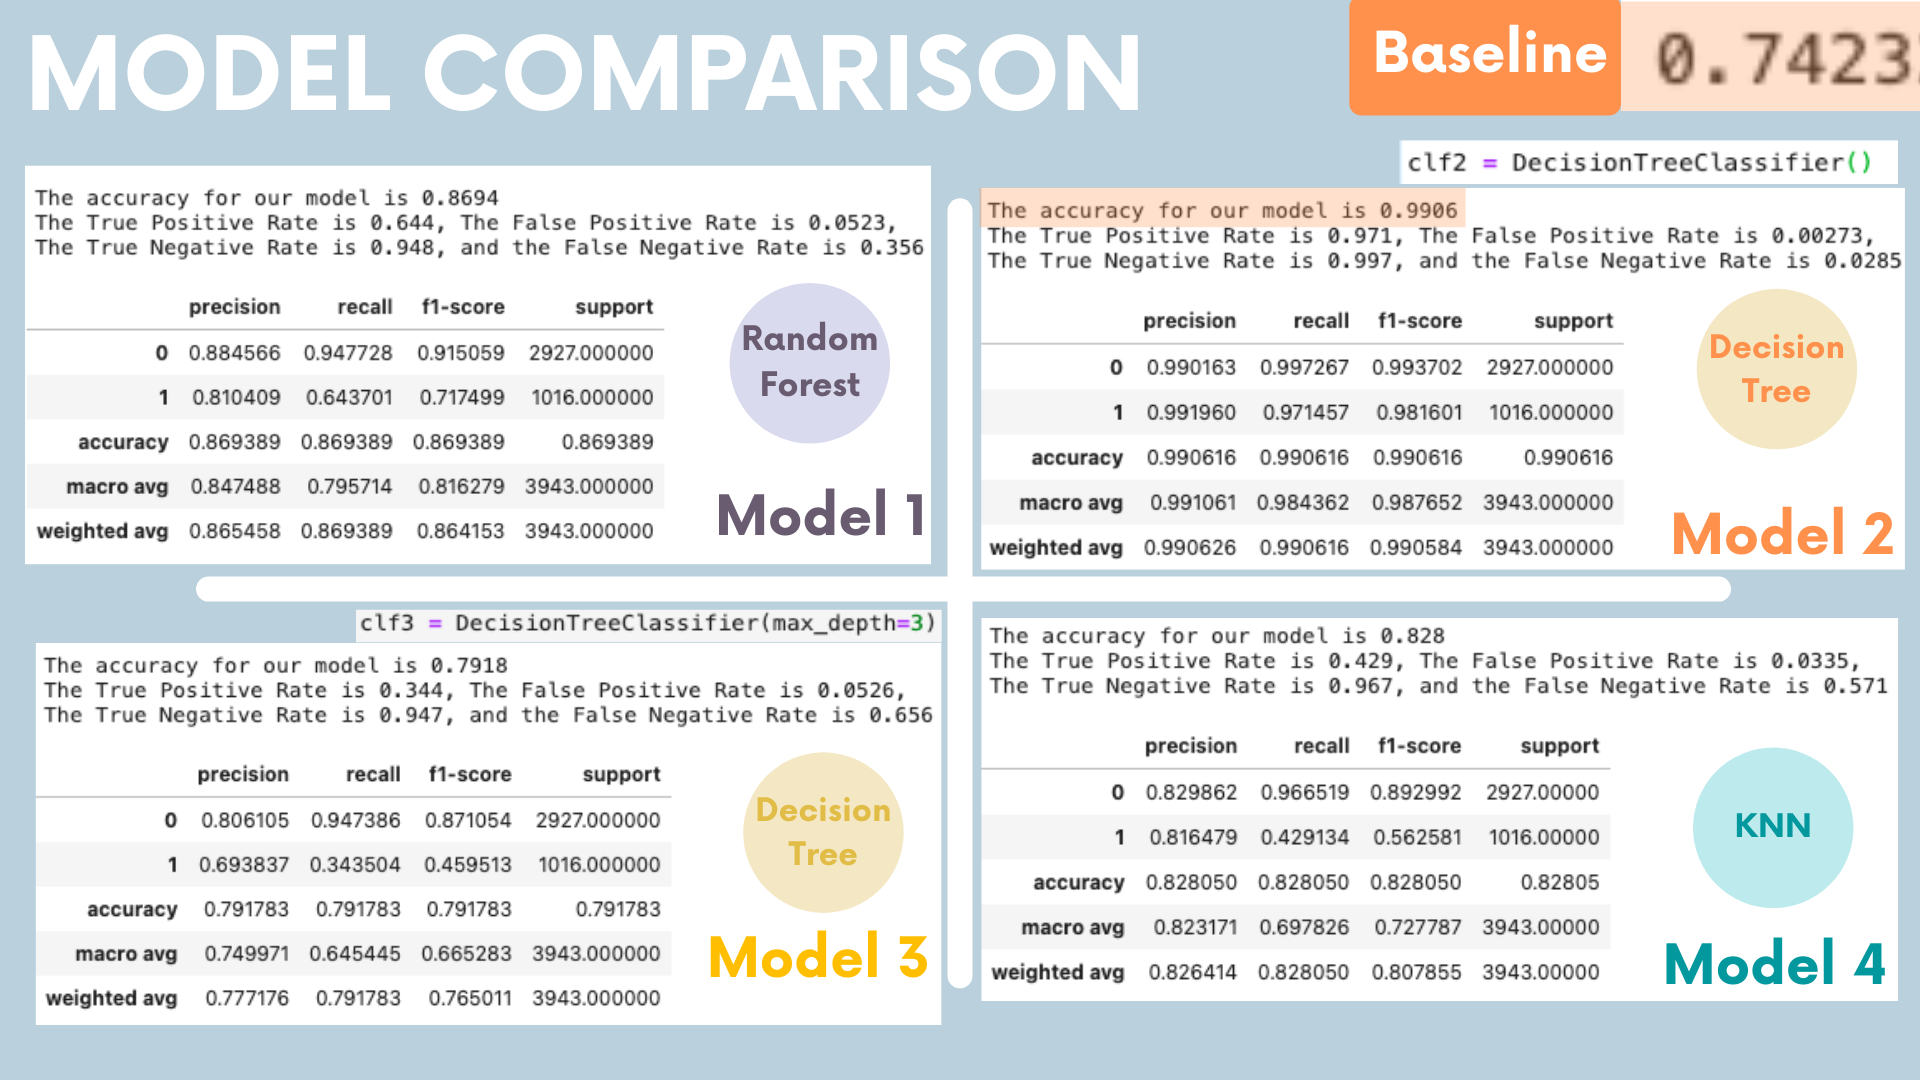

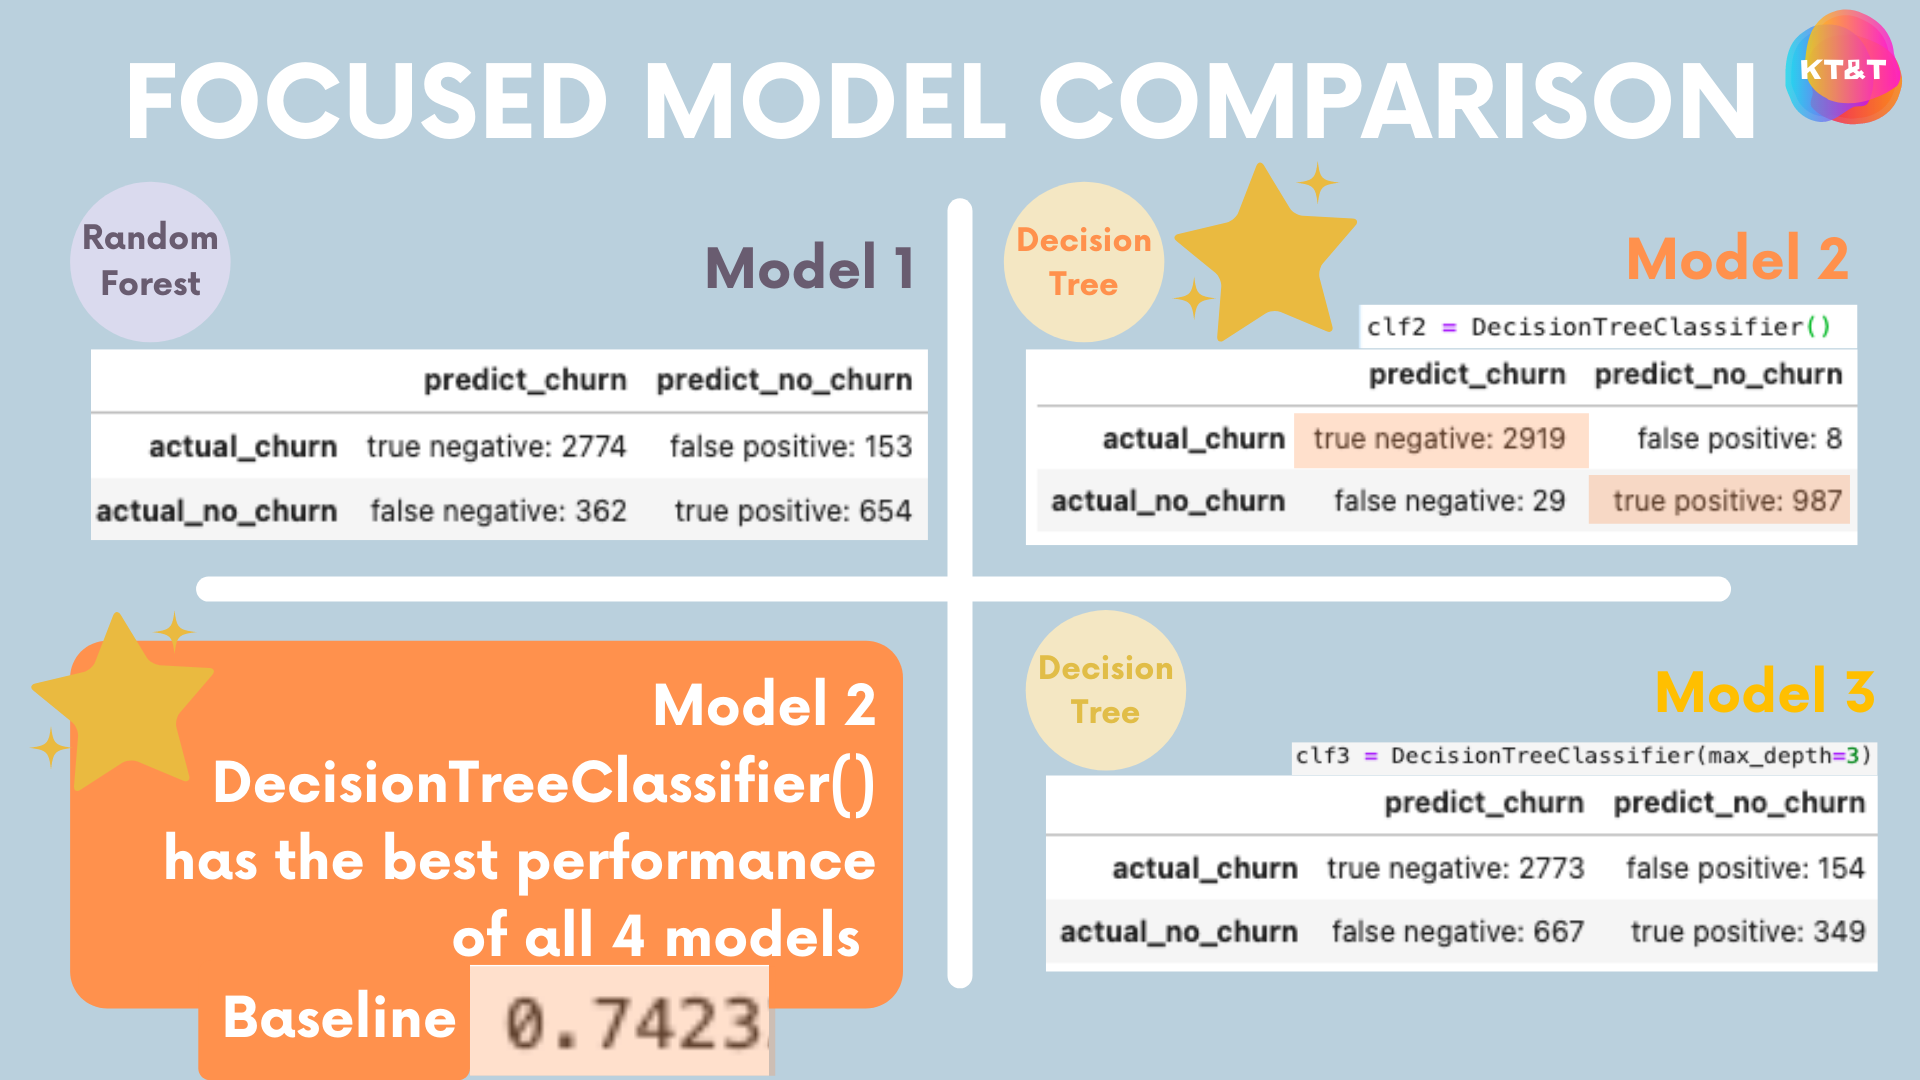

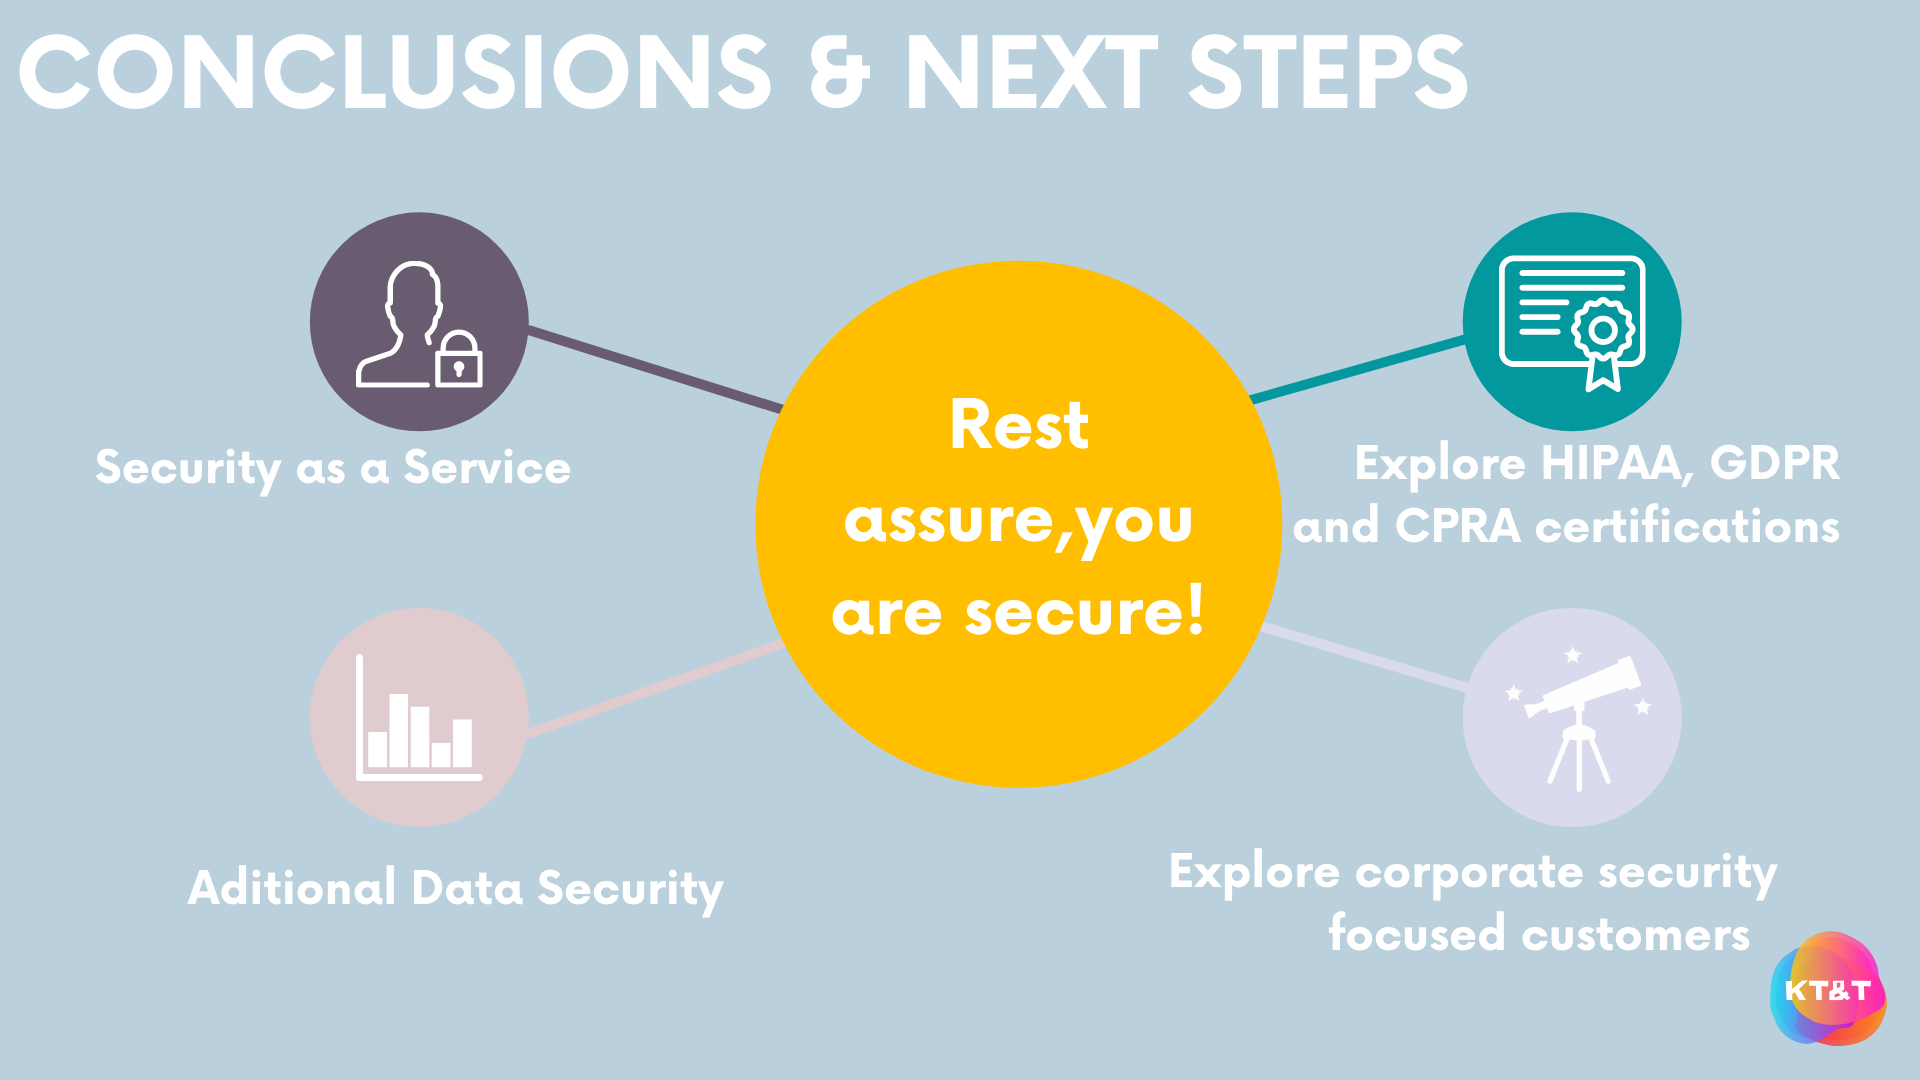

# def prep_full_telco(df):
    '''
    Does the same thing as prep_telco_model except no split. For creating CSV
    '''

        
    #df.replace(to_replace = " ", value = np.nan, inplace = True)
    
   # get list of columns that need to be encoded as they are 'object' types: 
    #cols = [col for col in list(df.columns) if df[col].dtype == 'object']

    #turn all text (object) columns to numbers using LabelEncoder()
    #label_encoder = LabelEncoder()
    #for col in cols:
     #   df[col] = label_encoder.fit_transform(df[col])

    return df

# Deliver

In [ ]:
import prepare
import acquire

In [ ]:
# use a version of the prep function that does not split the data
df = acquire.read_telco_data()
df.shape

In [ ]:
df_full = df

In [ ]:
df_full.info()

In [ ]:
# from the imported prepare file, call the helper functions to prepare data 
# prep_telco function
# shape = (7043,24)
prepare.create_tenure_year(df_full)
# is_churn function: Function used to create a new column for churn
prepare.is_churn(df_full)
# encode_all function: encodes columns into integers
# shape = (7043,26)
prepare.encode_all(df_full)
# security_features, backup_features, device_protection and encoding
# shape = (7043,29)
prepare.prep_telco_model(df_full)
df.shape
# security_features, backup_features, device_protection and encoding
# shape = (7043,29)
prepare.security_features(df_full)
prepare.backup_features(df_full)
prepare.device_protection_features(df_full)
prepare.encode_feature_columns(df_full)
df.shape

In [ ]:
df.info()

In [ ]:
df_full.total_charges = df_full.total_charges.str.replace(' ', '0').astype(float)

In [ ]:
# drop out non-numerical columns or non-encoded version remaining in this data set
# Note convereted the security features as int64 and dropping the object column versions
drops = ['payment_type_id', 'contract_type_id',
        'senior_citizen', 'tenure', 'gender', 'partner', 'dependents', 'phone_service',
        'multiple_lines','streaming_tv', 'streaming_movies',
        'paperless_billing', 'online_security', 'online_backup', 
       'device_protection', 'tech_support', 'churn', 'contract_type', 'payment_type', 'internet_service_type'
       ]
# , 'total_charges', 'tenure_years', 'internet_service_type_id'

In [ ]:
df_full.drop(columns=drops, inplace=True)

In [ ]:
df_full.info()

In [ ]:
df_full.shape

In [ ]:
X_cols = ['internet_service_type_id', 'monthly_charges', 'total_charges',
       'tenure_years', 'security_features', 'backup_features',
       'device_protection_features']

In [ ]:
#create column that has prediction based on decision tree model
df_full ['predictions'] = clf2.predict(df_full[X_cols])

In [ ]:
#create dataframe that shows if that particular customer_id will churn of not
df_predictions = df_full[['customer_id', 'predictions']]
df_predictions.head()

In [ ]:
df_predictions.to_csv('predictions.csv')